In [11]:
%pip install scikit-fuzzy matplotlib
%pip install setuptools numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Definimos la clase aseguradora

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


class Aseguradora:
    def __init__(self):
        self.__set_valores_iniciales()
        self.__set_antecedentes()
        self.__set_prima()
        self.__set_membresias_difusas()
        self.__set_rules()
        self.__set_model()
        
    def __set_valores_iniciales(self):
        # Inicializamos los valores que nos da el ejercicio
        self.valores_reparaciones = [2, 5, 6, 8, 10, 11, 13, 15, 18, 20]
        self.valores_monto_reparacion = [750, 1235, 2427, 3625, 4500, 6800, 8105, 12300, 20125, 35250]
        self.valores_calificacion = [15, 19, 23, 42, 55, 59, 63, 72, 81, 85]
        self.valores_prima = np.linspace(1700, 6200, 10)
        
    def __set_antecedentes(self):
        # Inicializamos los antecedentes
        self.reparaciones = ctrl.Antecedent(np.array(self.valores_reparaciones), 'reparaciones')
        self.monto_reparacion = ctrl.Antecedent(np.array(self.valores_monto_reparacion), 'monto_reparacion')
        self.calificacion = ctrl.Antecedent(np.array(self.valores_calificacion), 'calificacion')

    def __set_prima(self):
        # Inicializamos consecuente
        self.prima = ctrl.Consequent(np.array(self.valores_prima), 'prima')
        # Creamos membresia difusa para la prima
        self.prima['baja']=fuzz.trimf(self.prima.universe,[1700,1700,3950])
        self.prima['media']=fuzz.trimf(self.prima.universe,[1700,3950,6200])
        self.prima['alta']=fuzz.trimf(self.prima.universe,[3950,6200,6200])

    def __set_membresias_difusas(self):
        # Creamos las membresias de logica difusa
        self.__set_gauss_reparaciones()
        self.monto_reparacion.automf(number=3, names=['bajo', 'medio', 'alto'])
        self.calificacion.automf(number=3, names=['baja', 'media', 'alta'])

    def __set_gauss_reparaciones(self):
        self.reparaciones['bajas'] = fuzz.gaussmf(
            self.reparaciones.universe,
            np.mean(self.valores_reparaciones[:3]),
            np.std(self.valores_reparaciones[:3])
        )
        self.reparaciones['medias'] = fuzz.gaussmf(
            self.reparaciones.universe,
            np.mean(self.valores_reparaciones[3:7]),
            np.std(self.valores_reparaciones[3:7])
        )
        self.reparaciones['altas'] = fuzz.gaussmf(
            self.reparaciones.universe,
            np.mean(self.valores_reparaciones[7:]),
            np.std(self.valores_reparaciones[7:])
        )
        # self.reparaciones.automf(number=3, names=['bajas', 'medias', 'altas'])
        
    def __set_rules(self):
        self.lista_reglas = []
        # Definimos las reglas del modelo
        rule1=ctrl.Rule(self.reparaciones['altas'] | self.monto_reparacion['alto'] & self.calificacion['alta'],self.prima['baja'])
        rule2=ctrl.Rule(self.reparaciones['medias'] | self.monto_reparacion['medio'] & self.calificacion['alta'],self.prima['baja'])
        rule3=ctrl.Rule(self.reparaciones['bajas'] | self.monto_reparacion['bajo'] & self.calificacion['baja'],self.prima['media'])
        rule4=ctrl.Rule(self.reparaciones['medias'] | self.monto_reparacion['medio'] & self.calificacion['media'],self.prima['media'])
        rule5=ctrl.Rule(self.reparaciones['altas'] | self.monto_reparacion['alto'] & self.calificacion['baja'],self.prima['alta'])
        rule6=ctrl.Rule(self.reparaciones['altas'] | self.monto_reparacion['alto'] & self.calificacion['media'],self.prima['alta'])
        
        self.lista_reglas.append(rule1)
        self.lista_reglas.append(rule2)
        self.lista_reglas.append(rule3)
        self.lista_reglas.append(rule4)
        self.lista_reglas.append(rule5)
        self.lista_reglas.append(rule6)
        
    def __set_model(self):
        control_system=ctrl.ControlSystem(self.lista_reglas)
        self.fuzzy_system=ctrl.ControlSystemSimulation(control_system)
        
    def compute_mostrar_resultado(self):
        self.fuzzy_system.compute()
        print(f"Valor Prima: {self.fuzzy_system.output['prima']}")
        print("Grafica del Resultado:")
        self.prima.view(sim=self.fuzzy_system)


In [13]:
import matplotlib.pyplot as plt

In [14]:
aseguradora = Aseguradora()

Grafica de Membresia Reparaciones


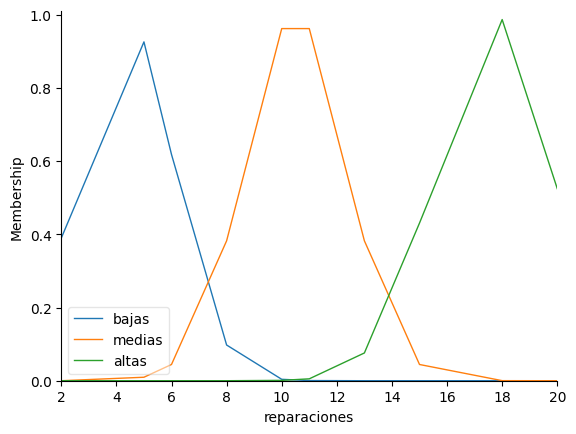

In [21]:
print("Grafica de Membresia Reparaciones")
aseguradora.reparaciones.view()
plt.show()

Grafica de Membresia Monto Reparacion


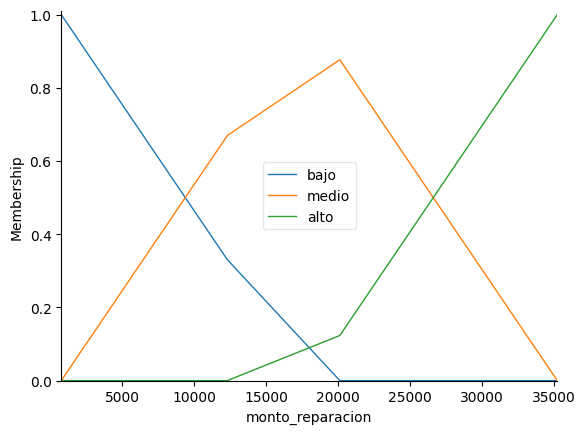

In [16]:
print("Grafica de Membresia Monto Reparacion")
aseguradora.monto_reparacion.view()
plt.show()

Grafica de Membresia Calificacion


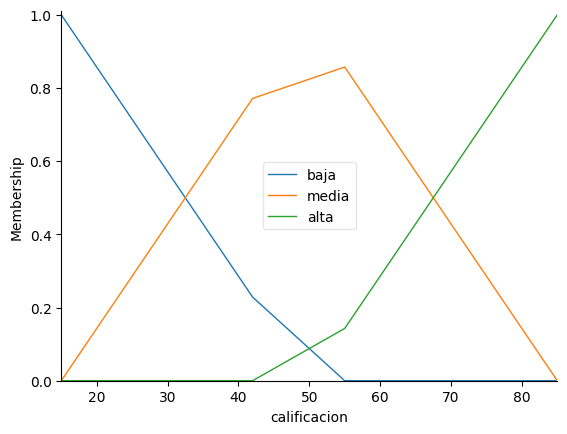

In [17]:
print("Grafica de Membresia Calificacion")
aseguradora.calificacion.view()
plt.show()

Grafica de Membresia Prima


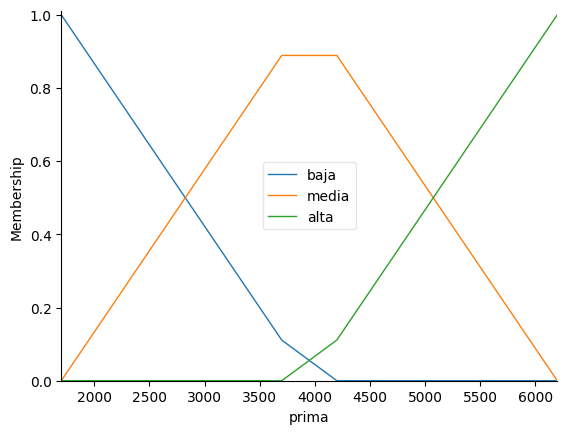

In [18]:
print("Grafica de Membresia Prima")
aseguradora.prima.view()
plt.show()

Ahora vamos a preguntarle al modelo cuál es el valor de la prima cuando:<br>
Reparaciones son 9, el Monto de Reparacion es 3'400.000, y la calificacion es de 65.

In [19]:
aseguradora.fuzzy_system.input['reparaciones']= 9
aseguradora.fuzzy_system.input['monto_reparacion']= 3400
aseguradora.fuzzy_system.input['calificacion']= 65

Valor Prima: 3612.488886231793
Grafica del Resultado:


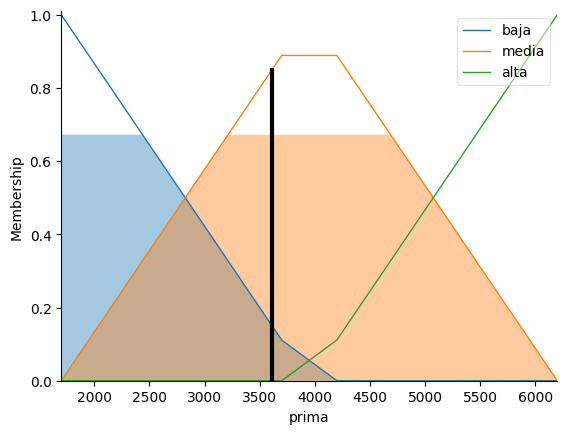

In [20]:
aseguradora.compute_mostrar_resultado()